<a href="https://colab.research.google.com/github/juanandres-montero/arbolfamiliar_CostaRica/blob/main/Arbol_familiar_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creado por: Juan Andrés Montero

In [1]:
#@markdown # Instalar requerimientos
!pip install tqdm -q
from tqdm import tqdm
import time
import os
commands = [
    "pip install selenium -q",
    "apt-get update -qq",
    "pip install pytesseract -q",
    "apt install chromium-chromedriver -qq",
    "pip install webdriver_manager -q",
    "pip install img2pdf pandas -q"
    "pip install fpdf2 -q"
    "pip install graphviz -q",
    "sudo apt-get install graphviz -qq",
]

for command in tqdm(commands):
    os.system(command)
    time.sleep(0.0001)
from ctypes.util import find_library
find_library("gs")
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

100%|██████████| 7/7 [00:59<00:00,  8.49s/it]

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


Mi nombre es: MANUEL ANTONIO VARGAS ALVAREZ
El padre de MANUEL ANTONIO VARGAS ALVAREZ es: MANUEL DE JESUS VARGAS ALVARADO
Cedula del padre: 304470945
La madre de MANUEL ANTONIO VARGAS ALVAREZ es: CARMEN LETICIA ALVAREZ BRICEÑO
Cedula de la madre: 304600704


El padre de MANUEL DE JESUS VARGAS ALVARADO es: CLEMENTE DE JESUS VARGAS ARGUEDAS
Cedula del padre: 303120051
La madre de MANUEL DE JESUS VARGAS ALVARADO es: YORLENY ALVARADO GRANADOS
Cedula de la madre: 0


YORLENY no está registrada
El padre de CARMEN LETICIA ALVAREZ BRICEÑO es: JUAN BERNARDO ALVAREZ MARTINEZ
Cedula del padre: 107610231
La madre de CARMEN LETICIA ALVAREZ BRICEÑO es: VERA VIOLETA BRICEÑO RODRIGUEZ
Cedula de la madre: 0


El padre de CLEMENTE DE JESUS VARGAS ARGUEDAS es: COSTARRICENSE
Cedula del padre: 0
La madre de CLEMENTE DE JESUS VARGAS ARGUEDAS es: ANTONIA VARGAS ARGUEDAS
Cedula de la madre: 0


El padre de CLEMENTE DE JESUS VARGAS ARGUEDAS no está registrado no está registrado
El padre de JUAN BERNARDO ALVARE

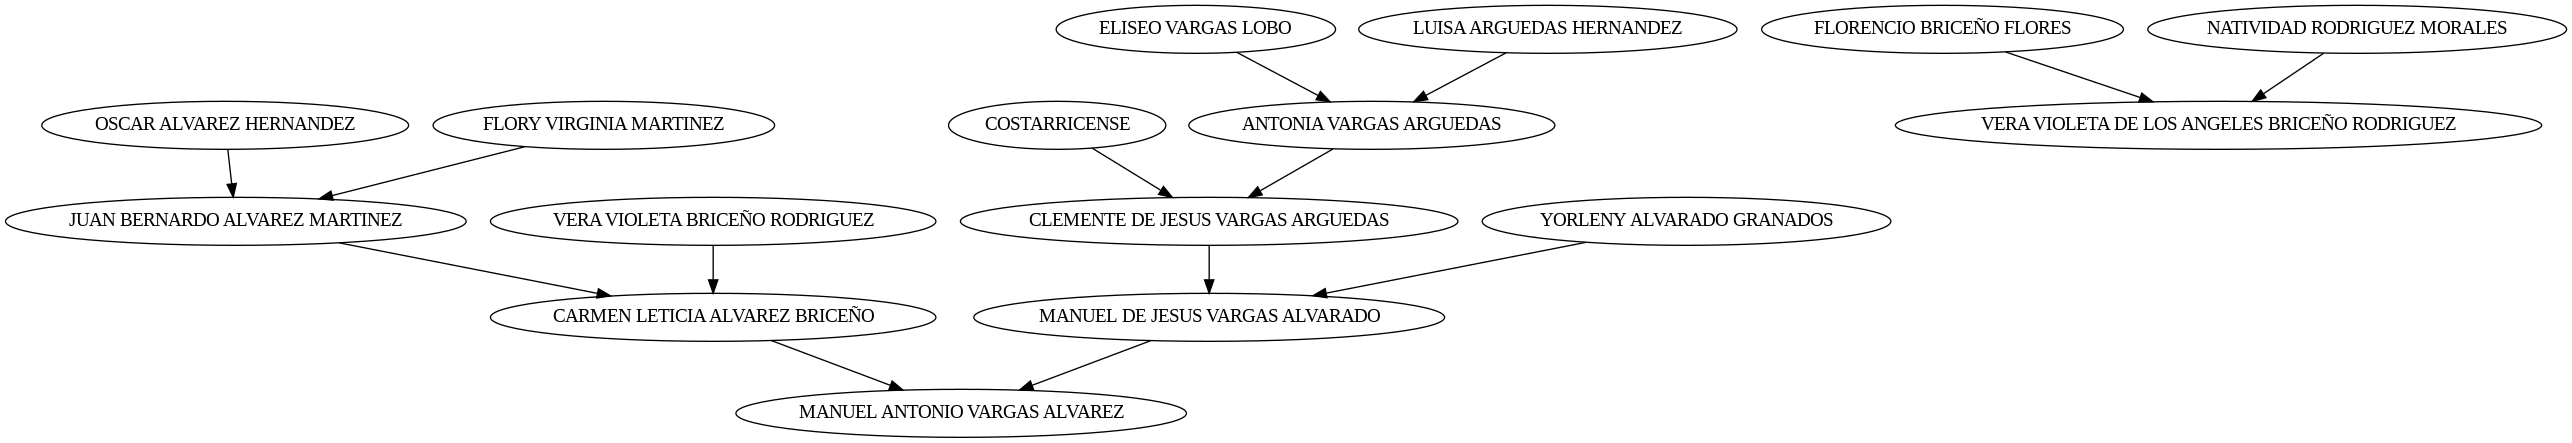

In [2]:
from re import A
#@markdown # Encuentre su árbol familiar
from io import open_code
import time
import warnings
import matplotlib.pyplot as plt
import networkx as nx
warnings.filterwarnings('ignore')

def get_info(cedula):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=options)
  driver.get('https://servicioselectorales.tse.go.cr/chc/consulta_cedula.aspx')
  box = driver.find_element('xpath','//*[@id="txtcedula"]')
  box.send_keys(cedula)
  driver.find_element('xpath','//*[@id="btnConsultaCedula"]').click()
  time.sleep(3)
  driver.find_element('xpath','//*[@id="LinkButton11"]').click()
  time.sleep(1)
  table = driver.find_element('xpath', '//*[@id="form1"]/table[2]')
  rows = table.find_elements('xpath','//*[@id="form1"]/table[2]/tbody/tr')
  df = pd.read_html(table.get_attribute('outerHTML'))
  driver.find_element('xpath','//*[@id="ImageConsultaCedula"]').click()
  time.sleep(1)
  return df

def get_info_by_name(nombre,apellido1,apellido2):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=options)
  driver.get('https://servicioselectorales.tse.go.cr/chc/consulta_nombres.aspx')
  box = driver.find_element('xpath','//*[@id="txtnombre"]')
  box.send_keys(nombre)
  box = driver.find_element('xpath','//*[@id="txtapellido1"]')
  box.send_keys(apellido1)
  box = driver.find_element('xpath','//*[@id="txtapellido2"]')
  box.send_keys(apellido2)
  driver.find_element('xpath','//*[@id="btnConsultarNombre"]').click()
  time.sleep(3)
  try:
    driver.find_element('xpath','//*[@id="chk1_0"]').click()
    driver.find_element('xpath','//*[@id="Button1"]').click()
    time.sleep(1)
    ced = driver.find_element('xpath', '//*[@id="lblcedula"]')
    ced = ced.text
    return ced
  except:
    ced = ""
    return ced

def format(df):
  df_transposed = df.transpose()
  f0 = df_transposed.iloc[[0]]
  f1 = df_transposed.iloc[[1]]
  f2 = df_transposed.iloc[[2]]
  f3 = df_transposed.iloc[[3]]
  df0 = pd.concat([f0, f1], axis=0)
  df1 = pd.concat([f2, f3], axis=0)
  df1 = df1.reset_index()
  new_df = pd.concat([df0, df1], axis=1)
  new_df = new_df.drop(columns=['index'])
  new_df.columns = new_df.iloc[0]
  new_df = new_df.drop(0)
  new_df = new_df.dropna(axis=1, how='all')
  return new_df
#@markdown - Ingrese su número de cédula.

def tree(data,yo,string_var,relaciones):
  padre = data.iloc[0, 7]
  madre = data.iloc[0, 9]
  padre_c = data.iloc[0, 8]  # (fila 0, columna 9)
  madre_c = data.iloc[0, 10]
  if madre_c == "SI":
    padre = data.iloc[0, 6]
    padre_c = data.iloc[0, 7]  # (fila 0, columna 9)
    madre = data.iloc[0, 8]
    madre_c = data.iloc[0, 9]
  print(f"El padre de {yo} es: {padre}")
  print(f"Cedula del padre: {padre_c}")
  print(f"La madre de {yo} es: {madre}")
  print(f"Cedula de la madre: {madre_c}")
  print("\n")
  relaciones[yo] = {
        "padre": padre,
        "madre": madre
    }
  if padre_c == '0' and padre != "COSTARRICENSE":
    partes_nombre = padre.split()
    if len(partes_nombre) == 4:
      nombre = partes_nombre[0] + " " + partes_nombre[1]
      apellido1 = partes_nombre[2]
      apellido2 = partes_nombre[3]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 2:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      ### Fix
      padre_c = get_info_by_name(nombre,apellido1,"")
    elif len(partes_nombre) == 5:
      nombre = partes_nombre[0] + " " + partes_nombre[1]+ " " + partes_nombre[2]
      apellido1 = partes_nombre[3]
      apellido2 = partes_nombre[4]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 3:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      apellido2 = partes_nombre[2]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
    else:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[4]
      apellido2 = partes_nombre[5]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
  if madre_c == '0':
    partes_nombre = madre.split()
    if len(partes_nombre) == 4:
      nombre = partes_nombre[0] + " " + partes_nombre[1]
      apellido1 = partes_nombre[2]
      apellido2 = partes_nombre[3]
      madre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 2:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      ### Fix
      madre_c = get_info_by_name(nombre,apellido1,"")
    elif len(partes_nombre) == 5:
      nombre = partes_nombre[0] + " " + partes_nombre[1]+ " " + partes_nombre[2]
      apellido1 = partes_nombre[3]
      apellido2 = partes_nombre[4]
      madre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 3:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      apellido2 = partes_nombre[2]
      madre_c = get_info_by_name(nombre,apellido1,apellido2)
  if padre == "COSTARRICENSE":
    padre = "El padre de " + yo + " no está registrado"
    padre_c = ""
  if madre_c == "" and padre_c != "":
    print(nombre, "no está registrada")
    cedulas = padre_c
  elif padre_c == "" and madre_c != "":
    print(padre, "no está registrado")
    cedulas = madre_c
  elif padre_c and madre_c == "":
    cedulas = None
  elif padre_c and madre_c != "":
    cedulas = padre_c,madre_c
  data = pd.DataFrame()
  return cedulas, string_var, relaciones

def main():
  cedula = "305920397" #@param {type:"string"}
  df = pd.DataFrame()
  try:
    df = df._append(get_info(cedula))
  except:
    print('Error: Invalid cedula number')
  data = pd.DataFrame()
  data = data._append(format(df))
  yo = data.iloc[0, 1] + " " + data.iloc[0, 2] + " " +data.iloc[0, 3]
  print(f'Mi nombre es: {yo}')
  relaciones = {}
  string_var = 'Mi nombre es: ' + str(yo)
  cedulas, string_var, relaciones = tree(data,yo,string_var, relaciones)
  ids = list(cedulas)
  i=6
  #try:
  while i > 0:

    for cedula in ids:
      if i>0:
        df = pd.DataFrame()
        data = pd.DataFrame()
        df = df._append(get_info(cedula))
        data = data._append(format(df))
        yo = data.iloc[0, 1] + " " + data.iloc[0, 2] + " " +data.iloc[0, 3]
        tupla, string_var, relaciones= tree(data,yo,string_var, relaciones)
        if len(tupla) == 9:
          ids.append(tupla)
        else:
          try:
            lista_t = list(tupla)
          except:
            lista_t = None
          #try:
          if lista_t != None:
            ids.extend(lista_t)
        #except:
          #print(f'Los padres de {yo} no tienen la cedula registrada en el TSE')
        data = pd.DataFrame()
        df = pd.DataFrame()
        i=i-1
  return cedulas, string_var, relaciones
  #except:
   # print('Done!')
    #return string_var
if __name__ == '__main__':
  cedulas, string_var, relaciones = main()
#@markdown *Código utiliza solo la información disponible en el TSE

import graphviz
data = relaciones
def construir_arbol(data, individuo, graph, visitados):
    if individuo not in data or individuo in visitados:
        return

    visitados.add(individuo)

    padre = data[individuo]['padre']
    madre = data[individuo]['madre']

    graph.edge(padre, individuo)
    construir_arbol(data, padre, graph, visitados)

    graph.edge(madre, individuo)
    construir_arbol(data, madre, graph, visitados)

# Crear el gráfico
graph = graphviz.Digraph(comment='Arbol Genealogico')

# Construir el árbol para todos los individuos
visitados = set()
for individuo in data.keys():
    construir_arbol(data, individuo, graph, visitados)

# Visualizar el árbol
graph.render('arbol_genealogico_completo', format='pdf', view=True)
graph.render('arbol_genealogico_completo', format='png', view=True)
from IPython.display import Image
Image(filename='/content/arbol_genealogico_completo.png')

In [3]:
#@markdown # Descargue su árbol familiar
from google.colab import files
files.download('/content/arbol_genealogico_completo.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>